# Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về phân loại chất lượng rượu đỏ.

## 1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from scipy import stats

# Tải dữ liệu
df=pd.read_csv('diabetes.csv')
display.display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét:**
+ ta thấy dữ liệu tương quan giữa glucose với Outcome là 0.466 là cao nhất

In [7]:
groupted=df.groupby('Outcome')['Glucose'].mean().reset_index()
sorted=groupted.sort_values('Outcome',ascending=False)

#Kiểm tra dữ liệu
print(sorted.head())

   Outcome     Glucose
1        1  141.257463
0        0  109.980000


## 2. Trực quan hóa


### 2.1 Trực quan hóa với thư viện Matplotlib

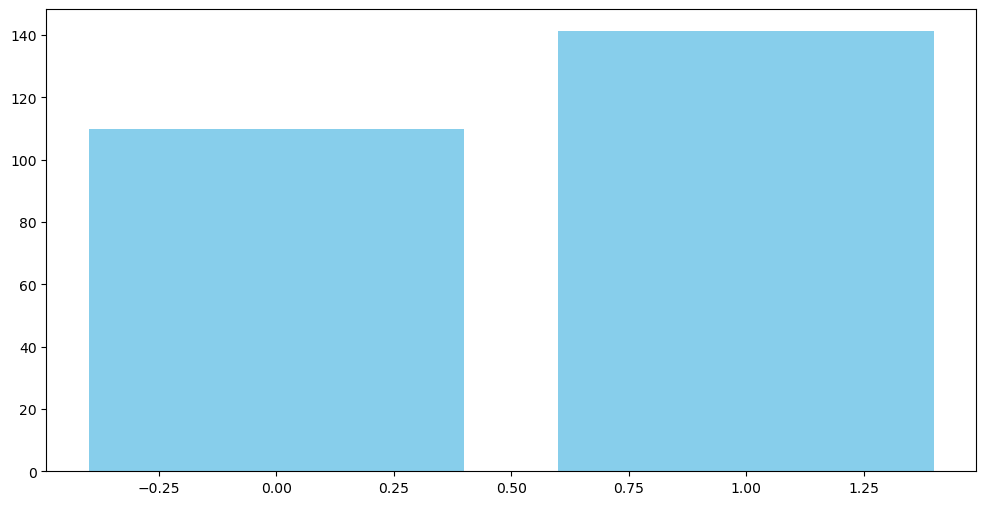

In [8]:
plt.figure(figsize=(12,6))
x=sorted['Outcome']
y=sorted['Glucose']
plt.bar(x,y,color='skyblue')
plt.show()

**Ý nghĩa:**
+ Trục x: mức 